In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncx2

## Part 1: Simulate a Feller square-root process (as used in Cox-Ingersoll-Ross model)
$dX(t) = alpha*(mu-X(t))*dt + sigma*sqrt(X(t))*dW(t)$


In [83]:
# Define parameters and time grid
npaths = 20000 # number of paths
T = 1 # time horizon
nsteps = 200 # number of time steps
dt = T/nsteps # time step
t = np.linspace(0,1, num=200+1) # observation times

# Model Parameters
alpha,mu,sigma = 5,0.07, 0.265 # model parameters
X0 = 0.03 # initial value
Feller_ratio = 2*alpha*mu/sigma**2

In [84]:
## CIRP with Euler-Method

# Allocate and initialise all paths
X = np.empty([nsteps+1,npaths])
X[0,:] = X0

# Sample standard Gaussian random numbers
N = np.random.randn(nsteps,npaths)

# Compute and accumulate the increments (Ballottta Page 112)
a = sigma**2/alpha*(np.exp(-alpha*dt)-np.exp(-2*alpha*dt)) # Euler with analytic moments
b = mu*sigma**2/(2*alpha)*(1-np.exp(-alpha*dt))**2 #Euler with analytic moments

# Degrees of freedom of the non-central chi square distribution
df = 4*alpha*mu/sigma**2 #for exact method
k = sigma**2*(1-np.exp(-alpha*dt))/(4*alpha) #for exact method

for i in range(nsteps): #(Ballottta Page 112)

    # Catch X smaller then 0
    # Mathematically, a cts time process, but here finite deltax
    x = np.maximum(X[i,:],0)

    # Method 1: plain Euler
    X[i+1,:] = x + alpha*(mu-x)*dt + sigma*np.sqrt(x*dt)*N[i,:]

    # Method 2: Euler with Analytical Moments
    # X[i+1,:] = mu+(x-mu)*np.exp(-alpha*dt) + np.sqrt(a*x+b)*N[i,:]

    # nonc = 4*alpha*x/(sigma**2*(np.exp(alpha*dt)-1))

    # Method 3: Exact method Version 1
    # X[i+1,:] = np.random.noncentral_chisquare(df, nonc)*k

    # Method 4: Exact method Version 2, very slow because inverse cdf
    # rand = np.random.uniform(size=(1,npaths))
    # X[i+1,:] = ncx2.ppf(rand,df,nonc)*k 


## Part 2:  Plot Theoretical and Simulated values of E(X0 and V(X)


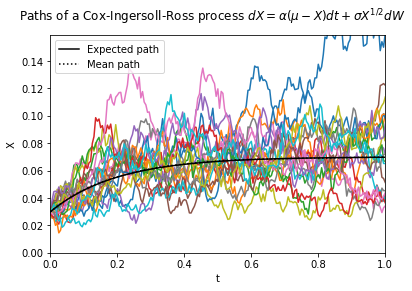

In [95]:
# Compute the theoretical expected value of CIRP
EX = mu+(X0-mu)*np.exp(-alpha*t)
SdevInf = sigma*np.sqrt(mu/(2*alpha))


# Estimate mean of X(t) from the simulations
SimulatedMean = np.mean(X,1)

# Plot the expected, mean and sample paths of the ABM
fig, ax = plt.subplots()
fig.suptitle(r'Paths of a Cox-Ingersoll-Ross process $dX = \alpha(\mu-X)dt + \sigma X^{1/2}dW$')
ax.plot(t,X[:,::1000])
ax.plot(t,EX,'k',label = 'Expected path')
ax.plot(t,SimulatedMean,'k:',label ='Mean path')

ax.set(ylim = [0,mu+4*SdevInf], xlim=[0,1], xlabel='t', ylabel='X')
ax.legend()

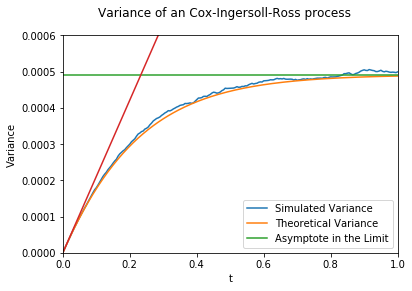

In [94]:
#Theoretical Variance
VAR = X0*sigma**2/alpha*(np.exp(-alpha*t)-np.exp(-2*alpha*t))+mu*sigma**2/(2*alpha)*(1-np.exp(-alpha*t))**2
VarInf = mu*(sigma**2/(2*alpha))*np.ones(len(t))
Var0 = X0*sigma**2*t

#Estimate variance from the simulations
SimulatedVar=np.var(X,1)

#Plot the Time Series and also plot the asymptote in the limit
fig, ax = plt.subplots()
fig.suptitle('Variance of an Cox-Ingersoll-Ross process')
ax.plot(t,SimulatedVar,label = 'Simulated Variance')
ax.plot(t,VAR,label = 'Theoretical Variance')
ax.plot(t,VarInf, label = 'Asymptote in the Limit')
ax.plot(t,Var0)
ax.set(ylim=[0,0.0006],xlim=[0,1], xlabel='t', ylabel='Variance')
ax.legend()

## Part 4: Probability density function of a Feller Square-Root Process at different times


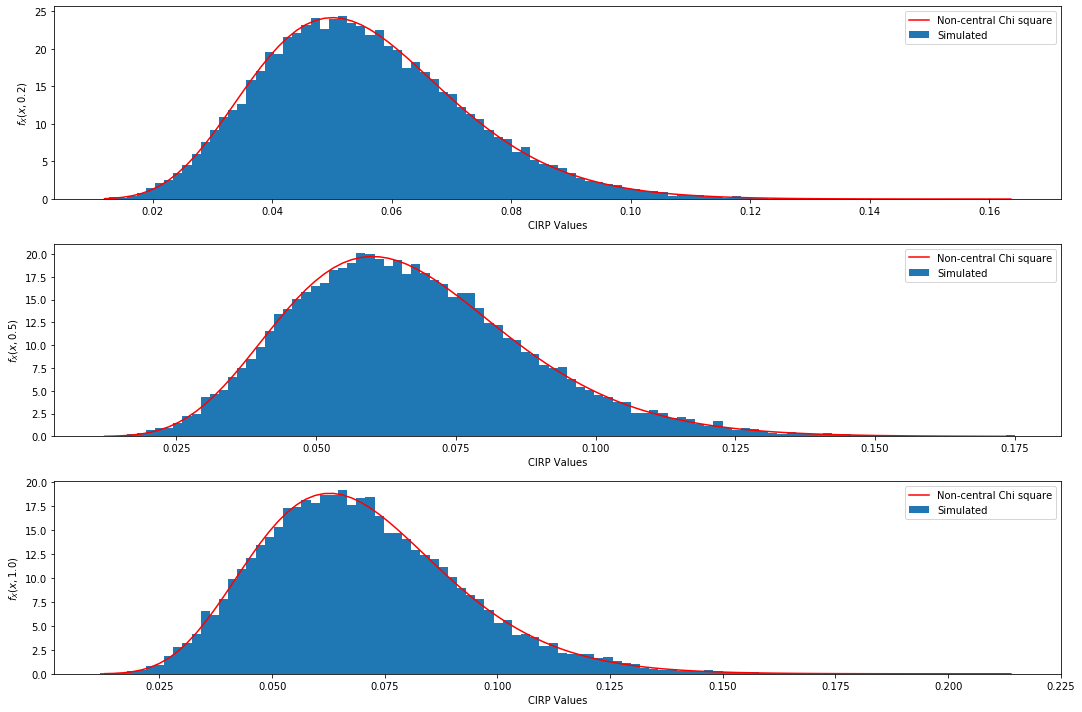

In [93]:
# We compare the simulated distribution of the process with the non-central chi square density with the same df and nonc.

# Degrees of freedom  and non centrality parameter of the non-central chi square distribution
df = 4*alpha*mu/sigma**2
nonc = 4*alpha*X0/(sigma**2*(np.exp(alpha*t)-1))
k = sigma**2*(1-np.exp(-alpha*t))/(4*alpha)

items = [40,100,200]

fig, ax = plt.subplots(3,figsize=(15,10))

for i,item in enumerate(items):

    
    hist,bins,patches = ax[i].hist(X[item,:],100,density=True,label='Simulated')
    bin_centers = (bins[:-1] + bins[1:])*0.5

    # f = ncx2.pdf(bin_centers/k[item],df = df, nc = nonc[item]/k[item])
    f = ncx2.pdf(bin_centers/k[item],df = df, nc = nonc[item])/k[item]

    ax[i].plot(bin_centers,f,'r',label ='Non-central Chi square')

    ax[i].set(xlabel='CIRP Values', ylabel='$f_X(x,%s)$' %(item/200) )
    ax[i].legend()

plt.tight_layout()

## Part 5: Time Evolution of the Density


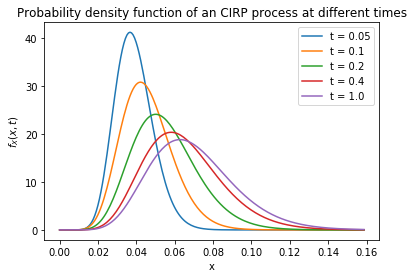

In [92]:
# We compare the simulated distribution of the process with the non-central chi square density with the same df and nonc.

x = np.linspace(0,mu+4*SdevInf,200)
t2 = np.array([0.05, 0.1, 0.2, 0.4, 1])

# Degrees of freedom  and non centrality parameter of the non-central chi square distribution
df = 4*alpha*mu/sigma**2
nonc = 4*alpha*X0/(sigma**2*(np.exp(alpha*t2)-1)) 
k = sigma**2*(1-np.exp(-alpha*t2))/(4*alpha)


f = np.empty([len(x),len(t2)])

fig, ax = plt.subplots()
for i in range(len(t2)):
    f[:,i] = ncx2.pdf(x/k[i],df =df, nc = nonc[i])/k[i] 
    ax.plot(x,f[:,i], label = 't = %s' %t2[i])

ax.set(xlabel='x', ylabel='$f_X(x,t)$',title='Probability density function of an CIRP process at different times')
ax.legend()
